In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import raw_data_path, direcslist, load_image, ImageQuant2, bounded_mean_1d, dosage
%matplotlib widget

In [2]:
# Specify paths
path = raw_data_path + 'Imaging/ring_ph'
paths = direcslist(path, 1)
lines = [p.strip('/').split('/')[-2].split('_')[1] for p in paths]
conditions = [p.strip('/').split('/')[-2].split('_')[2] for p in paths]

# Import data
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

# Import quantification model
membg = np.loadtxt('../../data/calibration_mem6.txt')
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
calibration_factor = np.loadtxt('../../data/calibration_constants.txt')[6]
print(calibration_factor)

3.105838399548696


  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<09:13,  1.08it/s]

  1%|█▎                                                                                                            | 7/600 [00:01<01:07,  8.84it/s]

  2%|██▎                                                                                                          | 13/600 [00:01<00:35, 16.67it/s]

  3%|███▍                                                                                                         | 19/600 [00:01<00:24, 23.93it/s]

  4%|████▌                                                                                                        | 25/600 [00:01<00:18, 30.42it/s]

  5%|█████▋                                                                                                       | 31/600 [00:01<00:15, 36.16it/s]

  6%|██████▋                                                                                                      | 37/600 [00:01<00:15, 36.55it/s]

  7%|███████▋                                                                                                     | 42/600 [00:01<00:14, 38.20it/s]

  8%|████████▌                                                                                                    | 47/600 [00:01<00:13, 39.88it/s]

  9%|█████████▍                                                                                                   | 52/600 [00:01<00:13, 42.01it/s]

 10%|██████████▌                                                                                                  | 58/600 [00:02<00:12, 44.96it/s]

 10%|███████████▍                                                                                                 | 63/600 [00:02<00:11, 45.77it/s]

 12%|████████████▌                                                                                                | 69/600 [00:02<00:11, 47.69it/s]

 12%|█████████████▍                                                                                               | 74/600 [00:02<00:11, 46.80it/s]

 13%|██████████████▎                                                                                              | 79/600 [00:02<00:10, 47.38it/s]

 14%|███████████████▍                                                                                             | 85/600 [00:02<00:10, 48.71it/s]

 15%|████████████████▌                                                                                            | 91/600 [00:02<00:10, 49.53it/s]

 16%|█████████████████▍                                                                                           | 96/600 [00:02<00:10, 48.16it/s]

 17%|██████████████████▎                                                                                         | 102/600 [00:02<00:10, 49.49it/s]

 18%|███████████████████▍                                                                                        | 108/600 [00:03<00:09, 50.62it/s]

 19%|████████████████████▌                                                                                       | 114/600 [00:03<00:09, 51.76it/s]

 20%|█████████████████████▌                                                                                      | 120/600 [00:03<00:09, 52.35it/s]

 21%|██████████████████████▋                                                                                     | 126/600 [00:03<00:08, 52.91it/s]

 22%|███████████████████████▊                                                                                    | 132/600 [00:03<00:08, 53.92it/s]

 23%|████████████████████████▊                                                                                   | 138/600 [00:03<00:08, 52.02it/s]

 24%|█████████████████████████▉                                                                                  | 144/600 [00:03<00:08, 53.06it/s]

 25%|███████████████████████████                                                                                 | 150/600 [00:03<00:08, 53.27it/s]

 26%|████████████████████████████                                                                                | 156/600 [00:03<00:08, 54.67it/s]

 27%|█████████████████████████████▏                                                                              | 162/600 [00:04<00:08, 54.62it/s]

 28%|██████████████████████████████▏                                                                             | 168/600 [00:04<00:07, 54.96it/s]

 29%|███████████████████████████████▎                                                                            | 174/600 [00:04<00:07, 54.43it/s]

 30%|████████████████████████████████▍                                                                           | 180/600 [00:04<00:07, 53.07it/s]

 31%|█████████████████████████████████▍                                                                          | 186/600 [00:04<00:07, 52.79it/s]

 32%|██████████████████████████████████▌                                                                         | 192/600 [00:04<00:07, 52.52it/s]

 33%|███████████████████████████████████▋                                                                        | 198/600 [00:04<00:07, 51.78it/s]

 34%|████████████████████████████████████▋                                                                       | 204/600 [00:04<00:07, 51.47it/s]

 35%|█████████████████████████████████████▊                                                                      | 210/600 [00:05<00:07, 51.22it/s]

 36%|██████████████████████████████████████▉                                                                     | 216/600 [00:05<00:07, 49.38it/s]

 37%|███████████████████████████████████████▊                                                                    | 221/600 [00:05<00:07, 48.61it/s]

 38%|████████████████████████████████████████▋                                                                   | 226/600 [00:05<00:07, 48.42it/s]

 39%|█████████████████████████████████████████▊                                                                  | 232/600 [00:05<00:07, 49.70it/s]

 40%|██████████████████████████████████████████▊                                                                 | 238/600 [00:05<00:07, 49.78it/s]

 41%|███████████████████████████████████████████▉                                                                | 244/600 [00:05<00:07, 50.16it/s]

 42%|█████████████████████████████████████████████                                                               | 250/600 [00:05<00:06, 50.20it/s]

 43%|██████████████████████████████████████████████                                                              | 256/600 [00:05<00:06, 50.29it/s]

 44%|███████████████████████████████████████████████▏                                                            | 262/600 [00:06<00:06, 50.77it/s]

 45%|████████████████████████████████████████████████▏                                                           | 268/600 [00:06<00:06, 50.99it/s]

 46%|█████████████████████████████████████████████████▎                                                          | 274/600 [00:06<00:06, 50.73it/s]

 47%|██████████████████████████████████████████████████▍                                                         | 280/600 [00:06<00:06, 50.61it/s]

 48%|███████████████████████████████████████████████████▍                                                        | 286/600 [00:06<00:06, 50.02it/s]

 49%|████████████████████████████████████████████████████▌                                                       | 292/600 [00:06<00:06, 45.72it/s]

 50%|█████████████████████████████████████████████████████▍                                                      | 297/600 [00:06<00:06, 44.41it/s]

 50%|██████████████████████████████████████████████████████▎                                                     | 302/600 [00:06<00:07, 41.63it/s]

 51%|███████████████████████████████████████████████████████▎                                                    | 307/600 [00:07<00:06, 42.95it/s]

 52%|████████████████████████████████████████████████████████▎                                                   | 313/600 [00:07<00:06, 45.33it/s]

 53%|█████████████████████████████████████████████████████████▏                                                  | 318/600 [00:07<00:06, 44.75it/s]

 54%|██████████████████████████████████████████████████████████▏                                                 | 323/600 [00:07<00:06, 42.06it/s]

 55%|███████████████████████████████████████████████████████████                                                 | 328/600 [00:07<00:07, 38.41it/s]

 55%|███████████████████████████████████████████████████████████▊                                                | 332/600 [00:07<00:08, 29.83it/s]

 56%|████████████████████████████████████████████████████████████▍                                               | 336/600 [00:08<00:10, 24.36it/s]

 57%|█████████████████████████████████████████████████████████████▍                                              | 341/600 [00:08<00:09, 28.33it/s]

 58%|██████████████████████████████████████████████████████████████▎                                             | 346/600 [00:08<00:07, 32.69it/s]

 59%|███████████████████████████████████████████████████████████████▎                                            | 352/600 [00:08<00:06, 37.07it/s]

 60%|████████████████████████████████████████████████████████████████▍                                           | 358/600 [00:08<00:05, 40.52it/s]

 60%|█████████████████████████████████████████████████████████████████▎                                          | 363/600 [00:08<00:05, 42.41it/s]

 61%|██████████████████████████████████████████████████████████████████▏                                         | 368/600 [00:08<00:05, 41.37it/s]

 62%|███████████████████████████████████████████████████████████████████▏                                        | 373/600 [00:08<00:05, 41.76it/s]

 63%|████████████████████████████████████████████████████████████████████                                        | 378/600 [00:08<00:05, 43.78it/s]

 64%|████████████████████████████████████████████████████████████████████▉                                       | 383/600 [00:09<00:04, 45.43it/s]

 65%|█████████████████████████████████████████████████████████████████████▊                                      | 388/600 [00:09<00:04, 46.42it/s]

 66%|██████████████████████████████████████████████████████████████████████▋                                     | 393/600 [00:09<00:04, 46.81it/s]

 66%|███████████████████████████████████████████████████████████████████████▋                                    | 398/600 [00:09<00:04, 46.94it/s]

 67%|████████████████████████████████████████████████████████████████████████▋                                   | 404/600 [00:09<00:04, 48.27it/s]

 68%|█████████████████████████████████████████████████████████████████████████▌                                  | 409/600 [00:09<00:03, 48.44it/s]

 69%|██████████████████████████████████████████████████████████████████████████▌                                 | 414/600 [00:09<00:03, 48.47it/s]

 70%|███████████████████████████████████████████████████████████████████████████▍                                | 419/600 [00:09<00:03, 48.39it/s]

 71%|████████████████████████████████████████████████████████████████████████████▎                               | 424/600 [00:09<00:03, 48.50it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▏                              | 429/600 [00:10<00:03, 48.32it/s]

 72%|██████████████████████████████████████████████████████████████████████████████                              | 434/600 [00:10<00:03, 47.54it/s]

 73%|███████████████████████████████████████████████████████████████████████████████                             | 439/600 [00:10<00:03, 46.00it/s]

 74%|███████████████████████████████████████████████████████████████████████████████▉                            | 444/600 [00:10<00:03, 41.30it/s]

 75%|████████████████████████████████████████████████████████████████████████████████▊                           | 449/600 [00:10<00:04, 37.26it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████▌                          | 453/600 [00:10<00:04, 36.54it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████▎                         | 457/600 [00:10<00:04, 35.49it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▉                         | 461/600 [00:10<00:04, 33.15it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████▋                        | 465/600 [00:11<00:04, 32.95it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████▍                       | 469/600 [00:11<00:03, 32.88it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████▏                      | 473/600 [00:11<00:03, 33.54it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████▏                     | 479/600 [00:11<00:03, 38.64it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████▉                     | 483/600 [00:11<00:03, 38.95it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████▋                    | 487/600 [00:11<00:03, 36.41it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████▍                   | 491/600 [00:11<00:03, 35.23it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████                   | 495/600 [00:11<00:03, 33.77it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████▊                  | 499/600 [00:12<00:03, 32.95it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▌                 | 503/600 [00:12<00:03, 32.14it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████▎                | 507/600 [00:12<00:02, 32.22it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████▉                | 511/600 [00:12<00:02, 33.21it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████▋               | 515/600 [00:12<00:02, 32.37it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████▍              | 519/600 [00:12<00:02, 32.00it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████▏             | 523/600 [00:12<00:02, 32.01it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████▊             | 527/600 [00:12<00:02, 31.98it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████▌            | 531/600 [00:13<00:02, 33.65it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████▋           | 537/600 [00:13<00:01, 39.11it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████▋          | 543/600 [00:13<00:01, 43.14it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊         | 549/600 [00:13<00:01, 45.63it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████▉        | 555/600 [00:13<00:00, 48.16it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 561/600 [00:13<00:00, 50.02it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████      | 567/600 [00:13<00:00, 50.96it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 573/600 [00:13<00:00, 52.04it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 579/600 [00:13<00:00, 52.47it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 585/600 [00:14<00:00, 52.09it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 591/600 [00:14<00:00, 35.80it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 596/600 [00:14<00:00, 37.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:14<00:00, 41.33it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

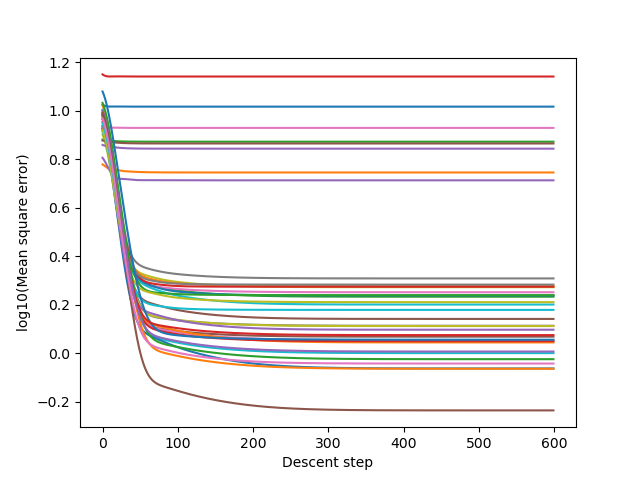

In [3]:
# Quantification
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg, pooling_rate=1, rol_ave=5, nfits=100)
iq.quantify()
iq.plot_losses(log=True)

In [4]:
# iq.plot_fits()

In [5]:
# iq.plot_quantification()

In [6]:
# Compile and save results
res = iq.compile_res()
res['Membrane signal'] *= calibration_factor
res.to_csv('../../data/ring_ph_quantification.csv')

In [7]:
# Perform summary quantification
res = pd.read_csv('../../data/ring_ph_quantification.csv')
cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
mems_tot = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal'])) 
mems_ant = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.25, 0.75))) 
mems_post = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.75, 0.25))) 
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot
   
df_dict = {'Path': paths, 'Line': lines, 'Condition': conditions, 'Cyt': cyts, 'Mem_tot': mems_tot, 
           'Mem_ant': mems_ant, 'Mem_post': mems_post, 'ASI': asis, 'Dosage': dosages, 'Total': totals}
df = pd.DataFrame(df_dict)
df['Path'] = df['Path'].apply(lambda x: x[len(raw_data_path):])
df.to_csv('../../data/ring_ph_embryos.csv')

### Remove polar body

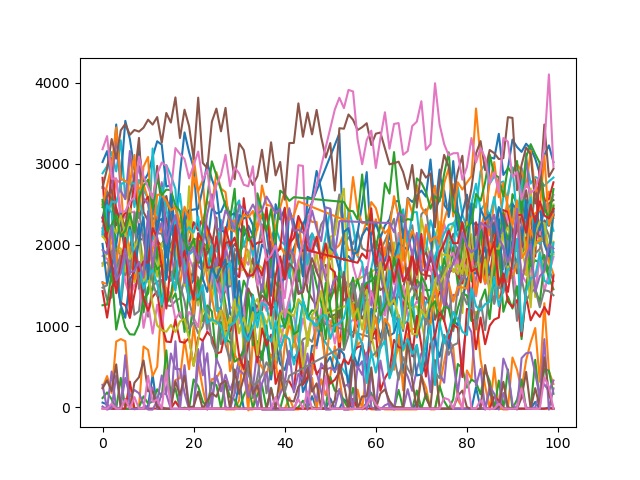

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

fig, ax = plt.subplots()
res = pd.read_csv('../../data/ring_ph_quantification.csv')
res_grouped = res.groupby('EmbryoID')
for (g, r), p, roi in zip(res_grouped, paths, rois):
    _mems = r['Membrane signal']
    mems = _mems.to_numpy()
    if os.path.exists(p + '/polar_body.txt'):
        polar_body = np.loadtxt(p + '/polar_body.txt')
        ind = int(100 * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0])
        mems[ind-5:ind+5] = np.nan
        nans, x= nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])  
    ax.plot(mems)
    res.loc[_mems.index, 'Membrane signal'] = mems
res.to_csv('../../data/ring_ph_quantification_no_pb.csv')

In [9]:
# Perform summary quantification
res = pd.read_csv('../../data/ring_ph_quantification_no_pb.csv')
cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
mems_tot = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal'])) 
mems_ant = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.25, 0.75))) 
mems_post = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.75, 0.25))) 
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot
   
df_dict = {'Path': paths, 'Line': lines, 'Condition': conditions, 'Cyt': cyts, 'Mem_tot': mems_tot, 
           'Mem_ant': mems_ant, 'Mem_post': mems_post, 'ASI': asis, 'Dosage': dosages, 'Total': totals}
df = pd.DataFrame(df_dict)
df['Path'] = df['Path'].apply(lambda x: x[len(raw_data_path):])
df.to_csv('../../data/ring_ph_embryos_no_pb.csv')